# Analise comportamental de clientes

In [46]:
!pip install prince -q

## Download dos dados

In [47]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zeesolver/consumer-behavior-and-shopping-habits-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/consumer-behavior-and-shopping-habits-dataset


## Importação das bibliotecas utilizadas

In [74]:
import os
import prince
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from itertools import combinations
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

from matplotlib.style import use
use('ggplot')

In [49]:
os.listdir(path)

['shopping_behavior_updated.csv', 'shopping_trends.csv']

## Dicionario de dados

ID do cliente: um identificador exclusivo atribuído a cada cliente individual, facilitando o rastreamento e a análise de seu comportamento de compra ao longo do tempo.

Idade: Idade do cliente, fornecendo informações demográficas para segmentação e estratégias de marketing direcionadas.

Gênero: A identificação de gênero do cliente, uma variável demográfica fundamental que influencia as preferências de produtos e os padrões de compra.

Item comprado: O produto ou item específico selecionado pelo cliente durante a transação.

Categoria: A classificação ampla ou grupo ao qual o item comprado pertence (por exemplo, roupas, eletrônicos, mantimentos).

Valor da compra (USD): O valor monetário da transação, expresso em dólares americanos (USD), indica o custo do(s) item(ns) comprado(s).

Localização: a localização geográfica onde a compra foi feita, oferecendo insights sobre preferências regionais e tendências de mercado.

Tamanho: A especificação do tamanho (se aplicável) do item comprado, relevante para vestuário, calçados e certos bens de consumo.

Cor: A variante ou escolha de cor associada ao item comprado, influenciando as preferências do cliente e a disponibilidade do produto.

Estação: A relevância sazonal do item comprado (por exemplo, primavera, verão, outono, inverno), impactando o gerenciamento de estoque e as estratégias de marketing.

Avaliação da avaliação: Uma avaliação numérica ou qualitativa fornecida pelo cliente em relação à sua satisfação com o item comprado.

Status da assinatura : indica se o cliente optou por um serviço de assinatura, oferecendo insights sobre seu nível de fidelidade e potencial de receita recorrente.

Tipo de envio: especifica o método usado para entregar o item comprado (por exemplo, envio padrão, entrega expressa), influenciando os prazos e custos de entrega.

Desconto aplicado: indica se algum desconto promocional foi aplicado à compra, esclarecendo a sensibilidade ao preço e a eficácia da promoção.

Código promocional usado: observa se um código promocional ou cupom foi utilizado durante a transação, auxiliando na avaliação do sucesso da campanha de marketing.

Compras anteriores: fornece informações sobre o número ou a frequência de compras anteriores feitas pelo cliente, contribuindo para estratégias de segmentação e retenção de clientes.

Método de pagamento: especifica o modo de pagamento empregado pelo cliente (por exemplo, cartão de crédito, dinheiro), oferecendo insights sobre opções de pagamento preferenciais.

Frequência de compras: indica a frequência com que o cliente realiza atividades de compra, uma métrica essencial para avaliar a fidelidade do cliente e o valor vitalício.

## Carregamento dos dados

In [50]:
df_shopping = pd.read_csv(path + "/shopping_behavior_updated.csv")
df_shopping.columns = ['id', 'idade', 'sexo', 'item_comprado', 'categoria', 'preco', 'localizacao', 'tamanho', 'cor', 'estacao', 'review', 'assinatura', 'tipo_envio', 'desconto_aplicado', 'codigo_promocional_aplicado', 'compras_anteriores', 'forma_pagamento', 'frequencia_compras']
df_shopping.head()

,id,idade,sexo,item_comprado,categoria,preco,localizacao,tamanho,cor,estacao,review,assinatura,tipo_envio,desconto_aplicado,codigo_promocional_aplicado,compras_anteriores,forma_pagamento,frequencia_compras
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [51]:
df_shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3900 non-null   int64  
 1   idade                        3900 non-null   int64  
 2   sexo                         3900 non-null   object 
 3   item_comprado                3900 non-null   object 
 4   categoria                    3900 non-null   object 
 5   preco                        3900 non-null   int64  
 6   localizacao                  3900 non-null   object 
 7   tamanho                      3900 non-null   object 
 8   cor                          3900 non-null   object 
 9   estacao                      3900 non-null   object 
 10  review                       3900 non-null   float64
 11  assinatura                   3900 non-null   object 
 12  tipo_envio                   3900 non-null   object 
 13  desconto_aplicado 

## Análise dos dados

### Análise quantitativa

In [52]:
num_columns = df_shopping.select_dtypes(include=['number']).columns.drop('id')

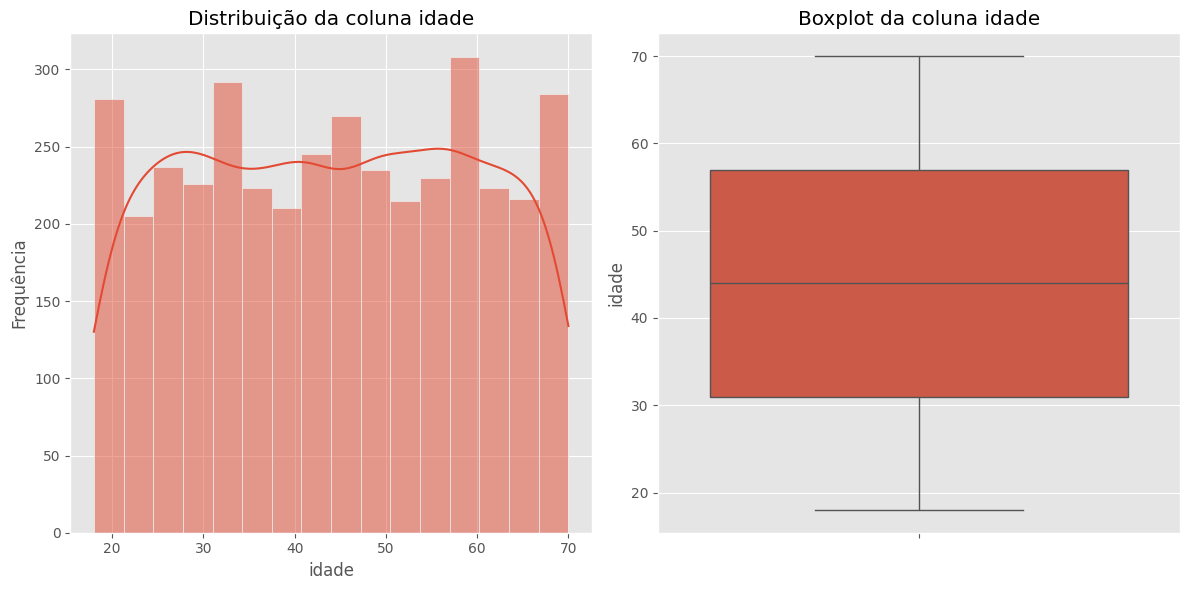

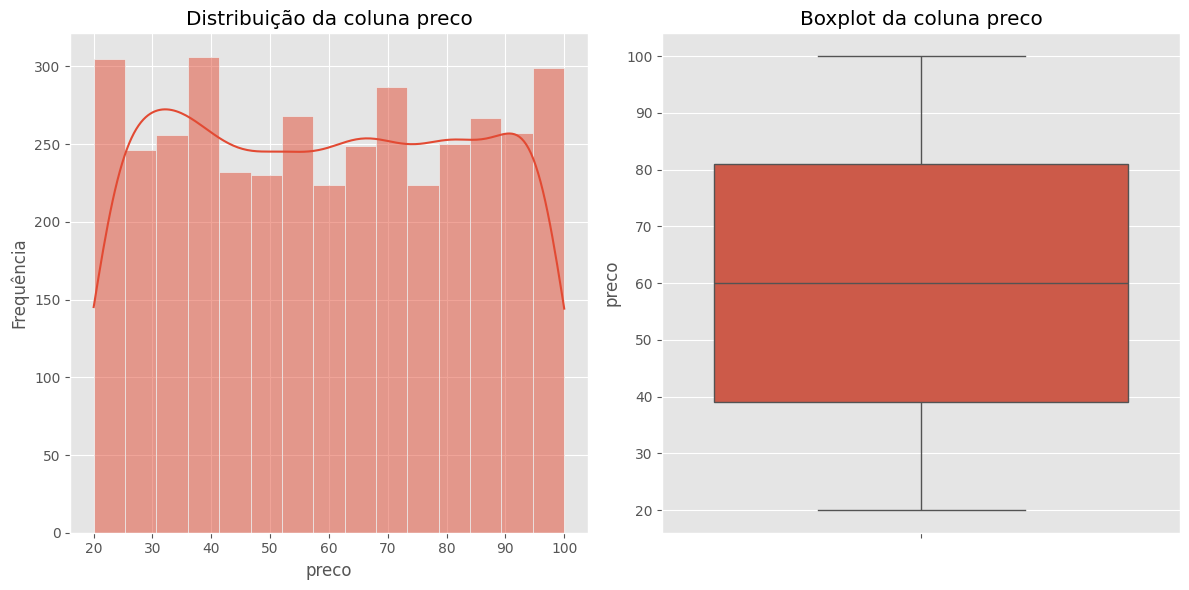

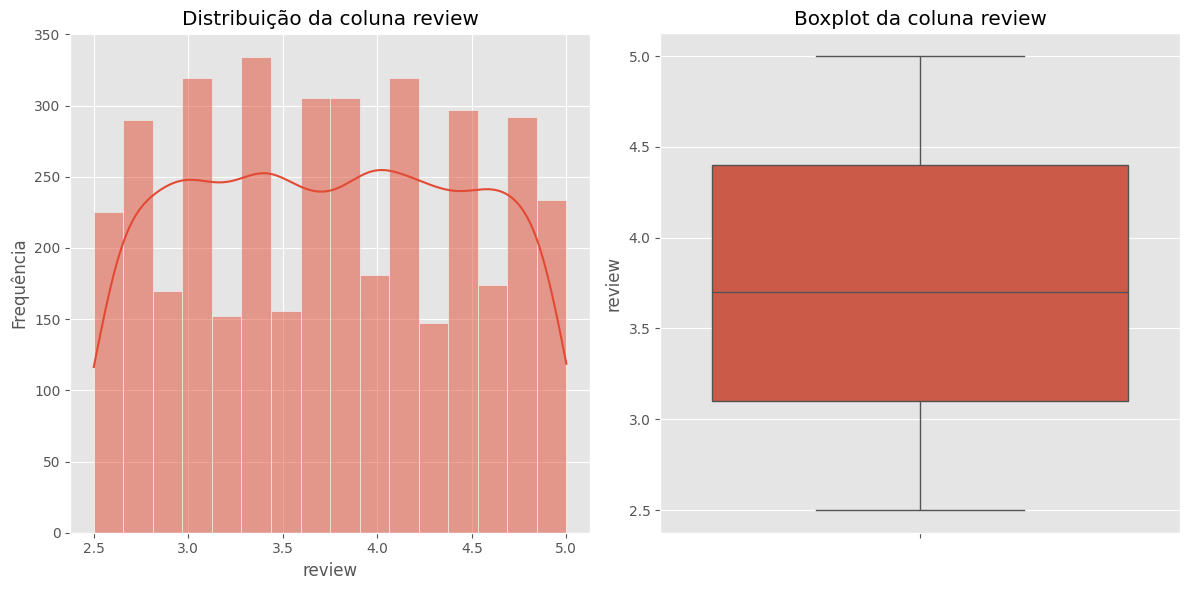

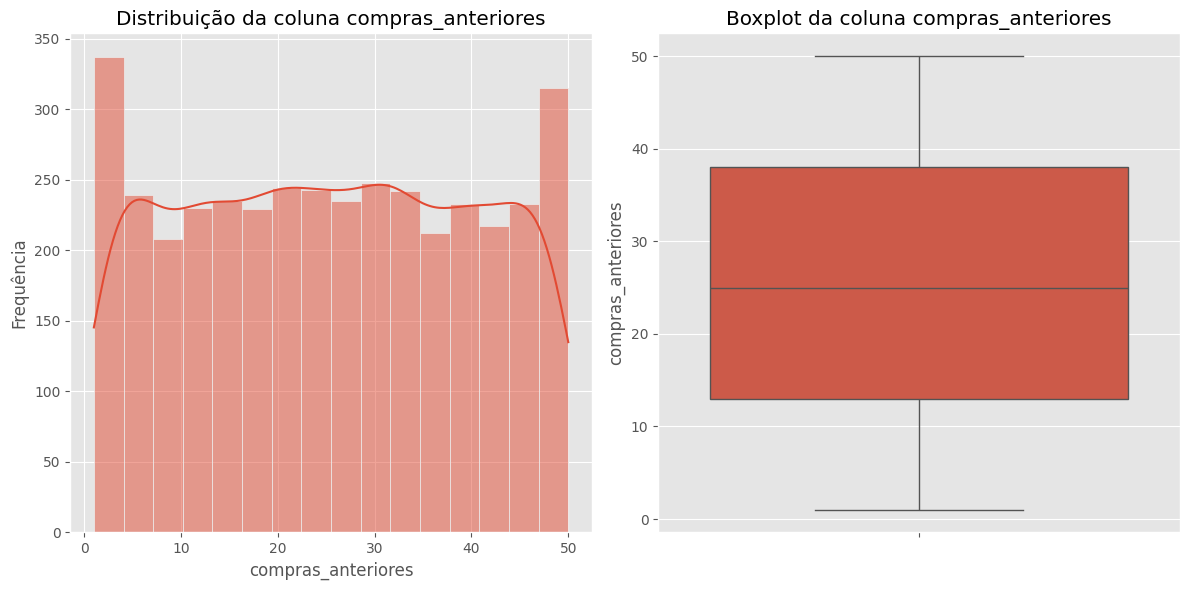

In [53]:
for column in num_columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df_shopping[column], kde=True)
    plt.title(f'Distribuição da coluna {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=column, data=df_shopping)
    plt.title(f'Boxplot da coluna {column}')
    plt.ylabel(column)

    plt.tight_layout()
    plt.show()

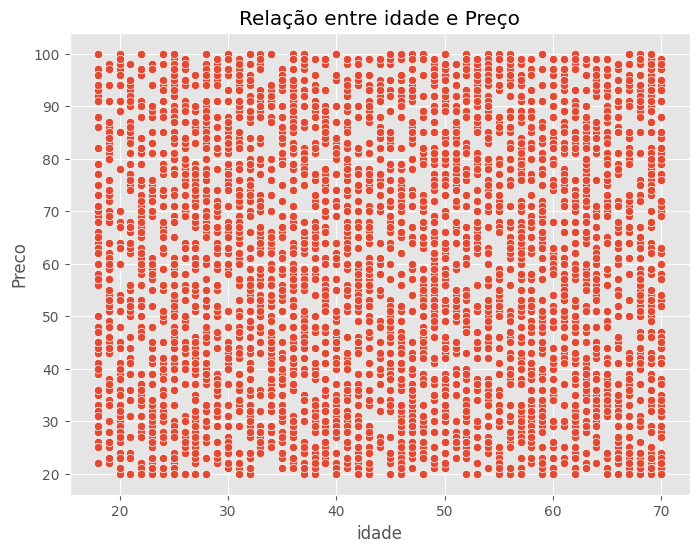

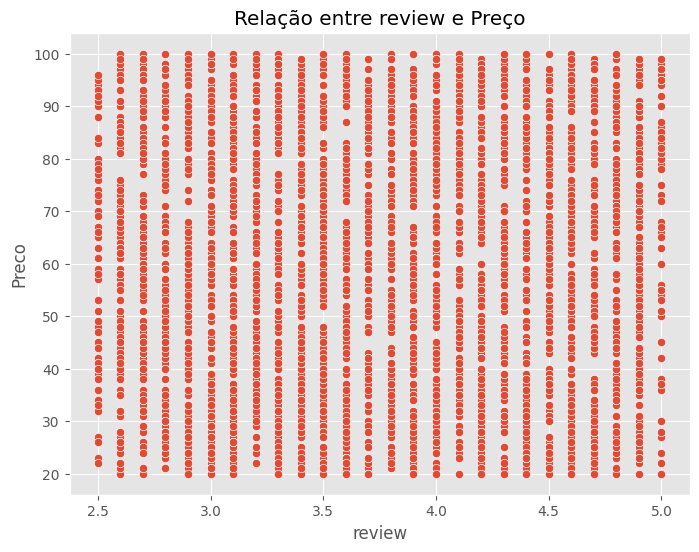

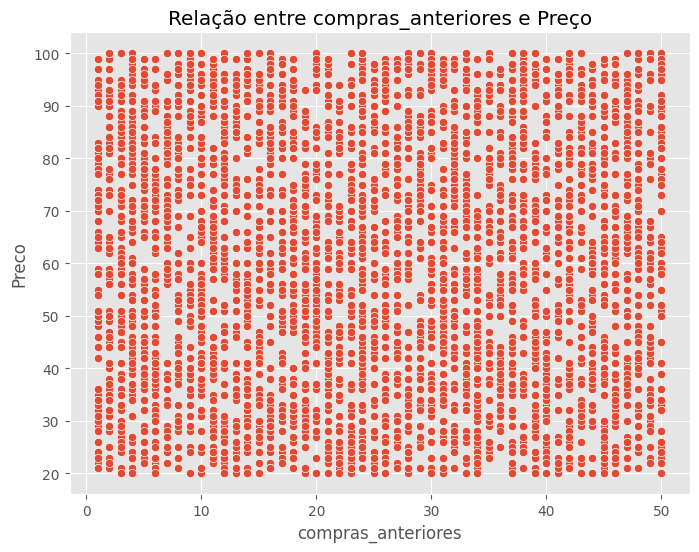

In [54]:
for column in num_columns.drop('preco'):
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=column, y='preco', data=df_shopping)
  plt.title(f'Relação entre {column} e Preço')
  plt.xlabel(column)
  plt.ylabel('Preco')
  plt.show()

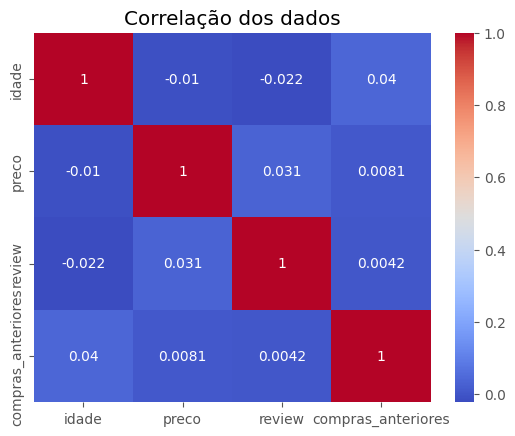

In [55]:
corr = df_shopping[num_columns].corr()
plt.title('Correlação dos dados')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Análise Qualitativa

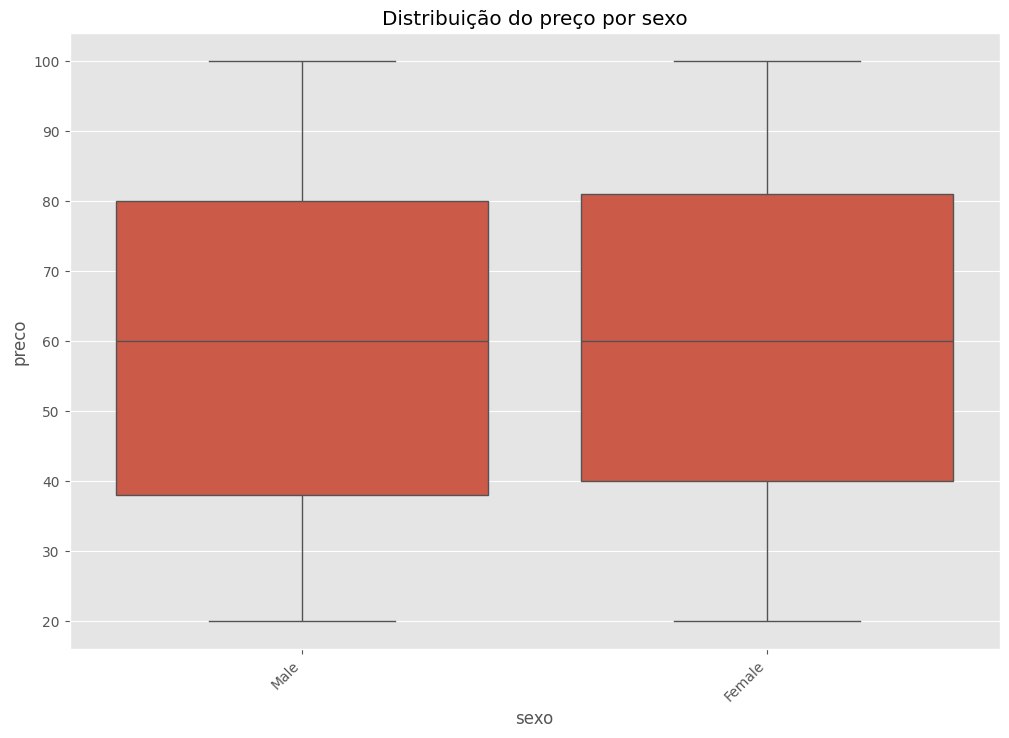

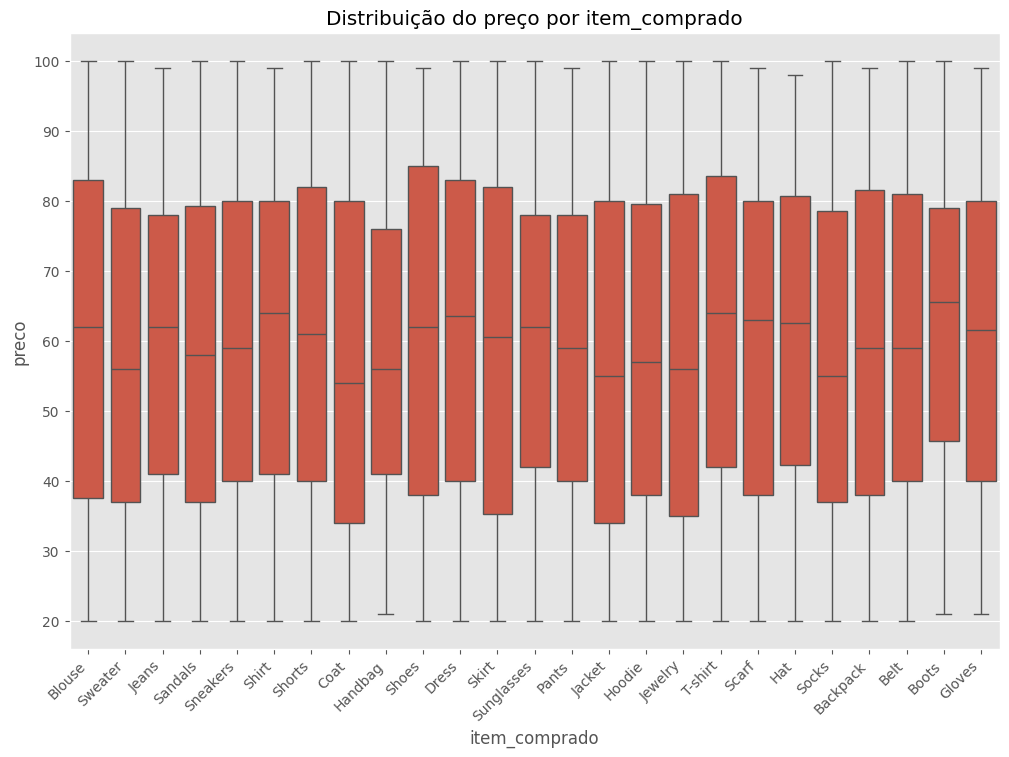

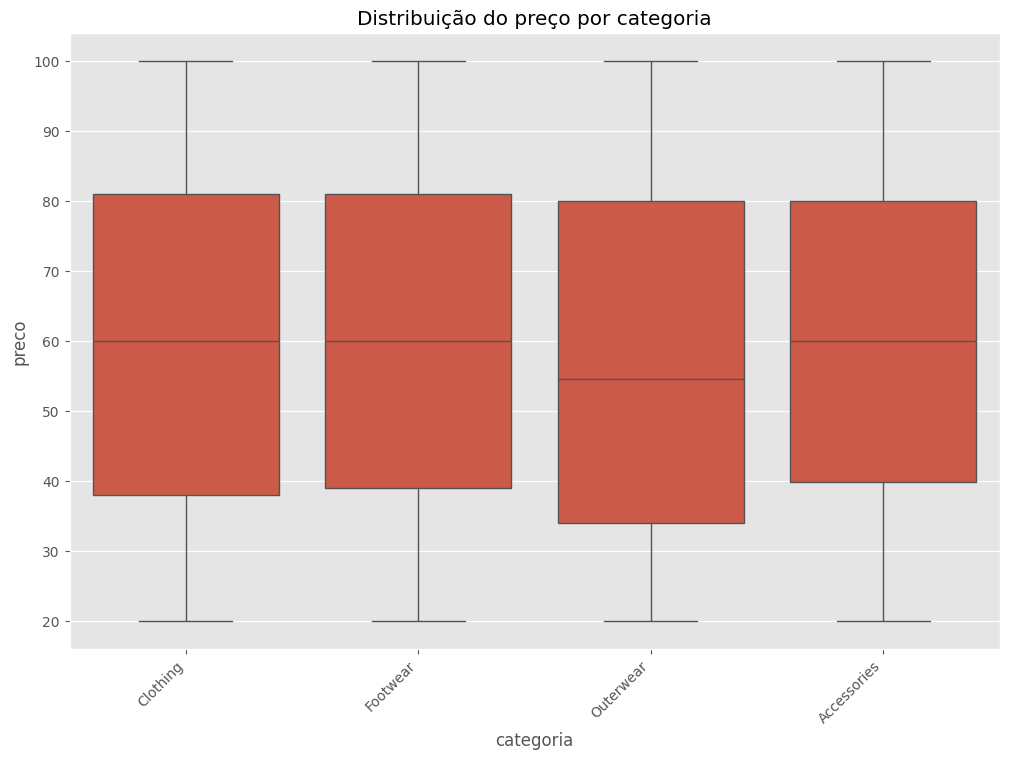

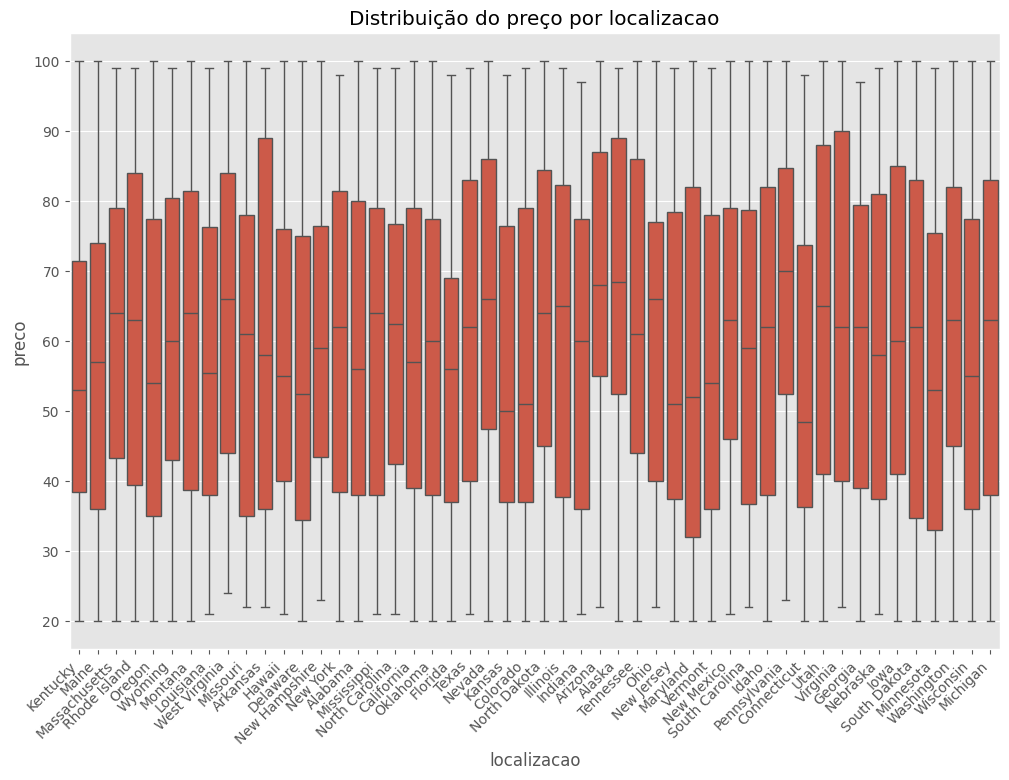

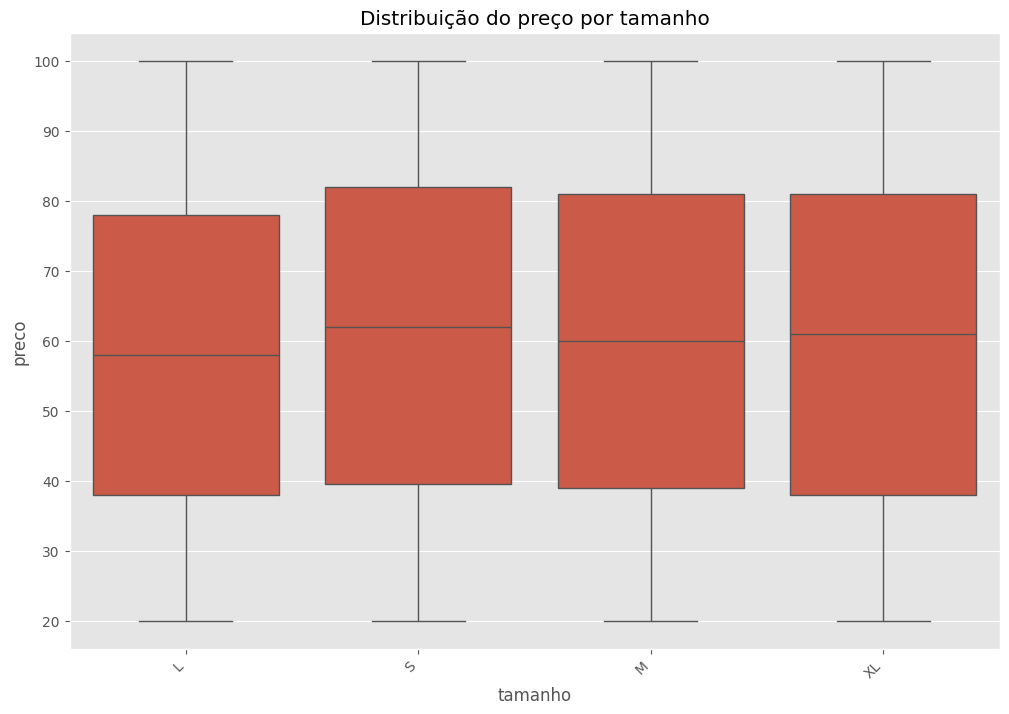

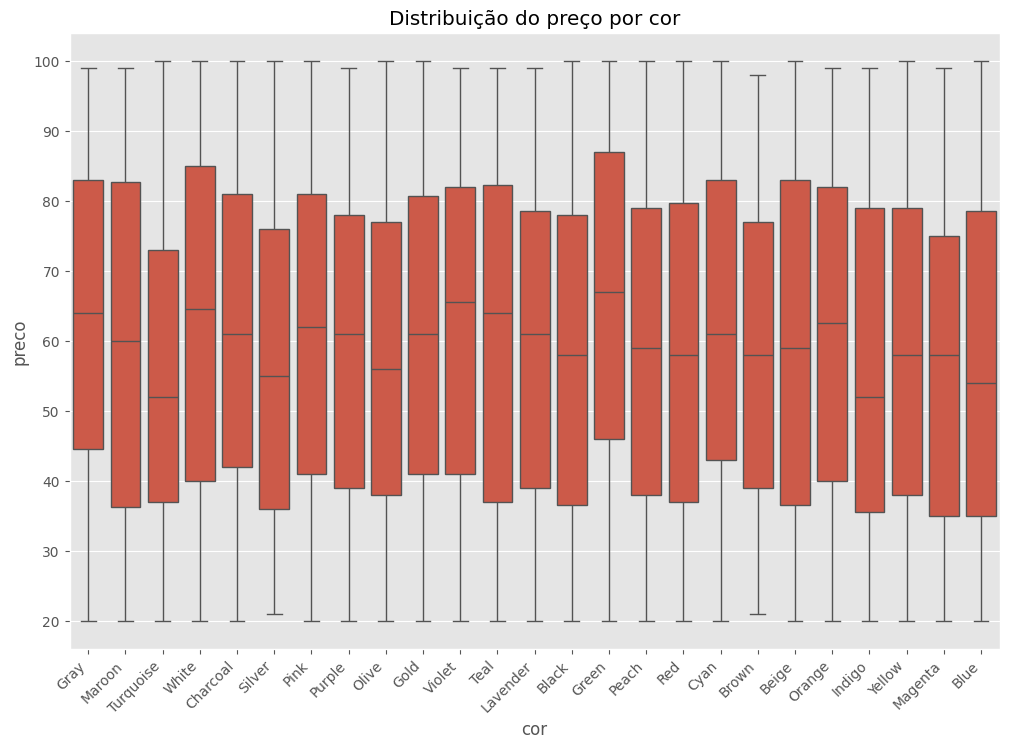

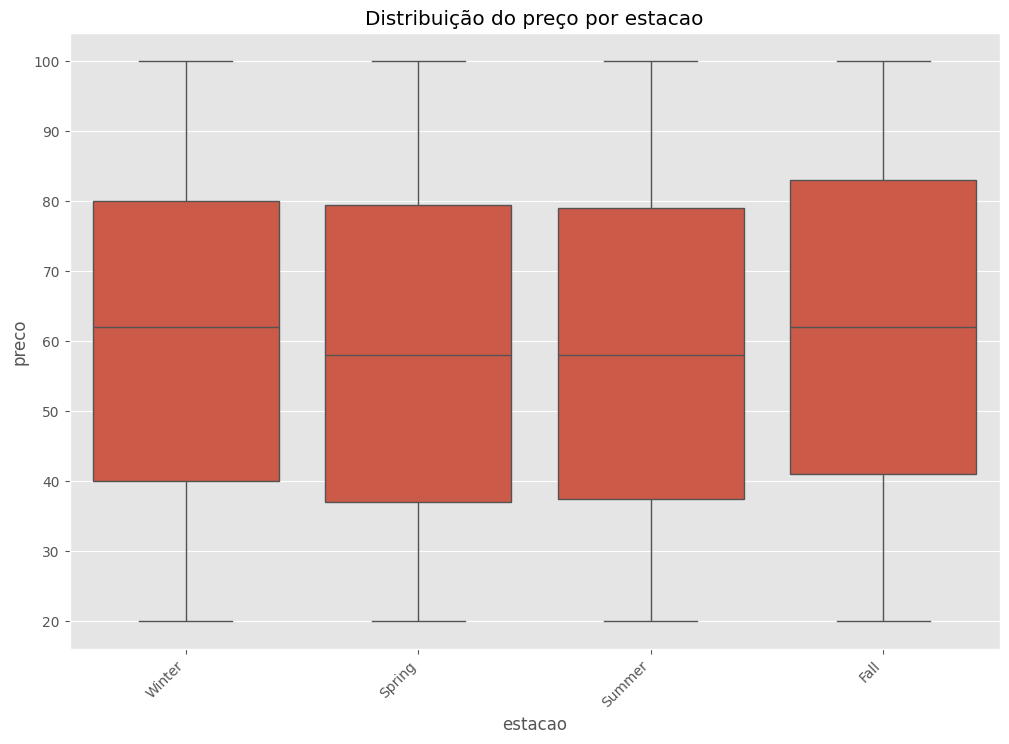

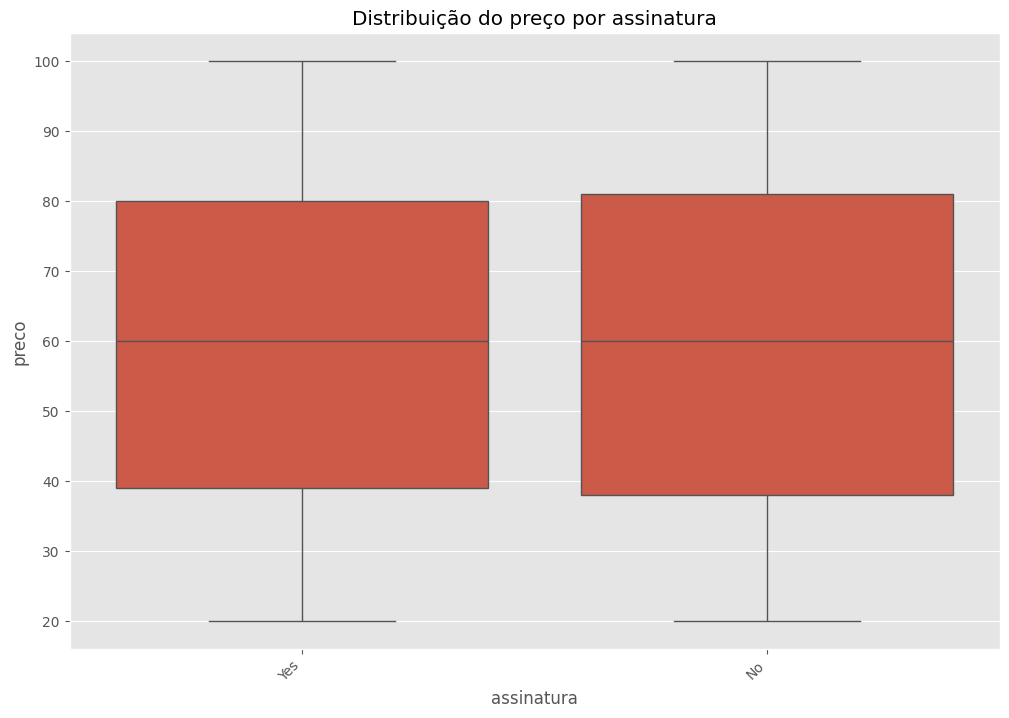

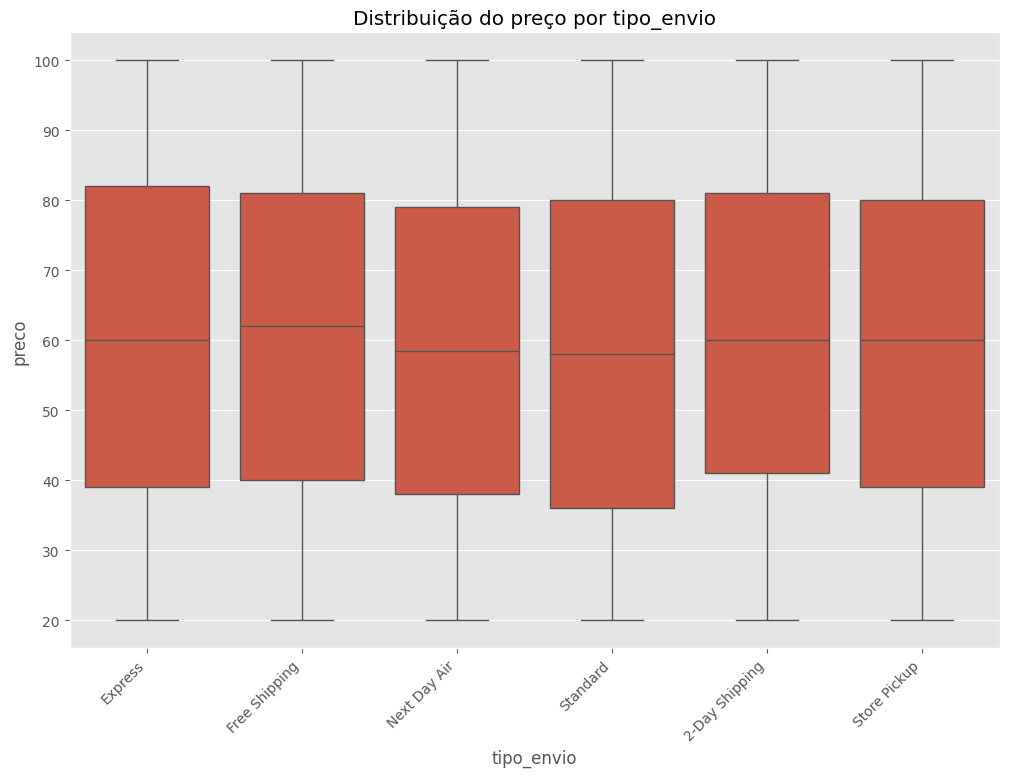

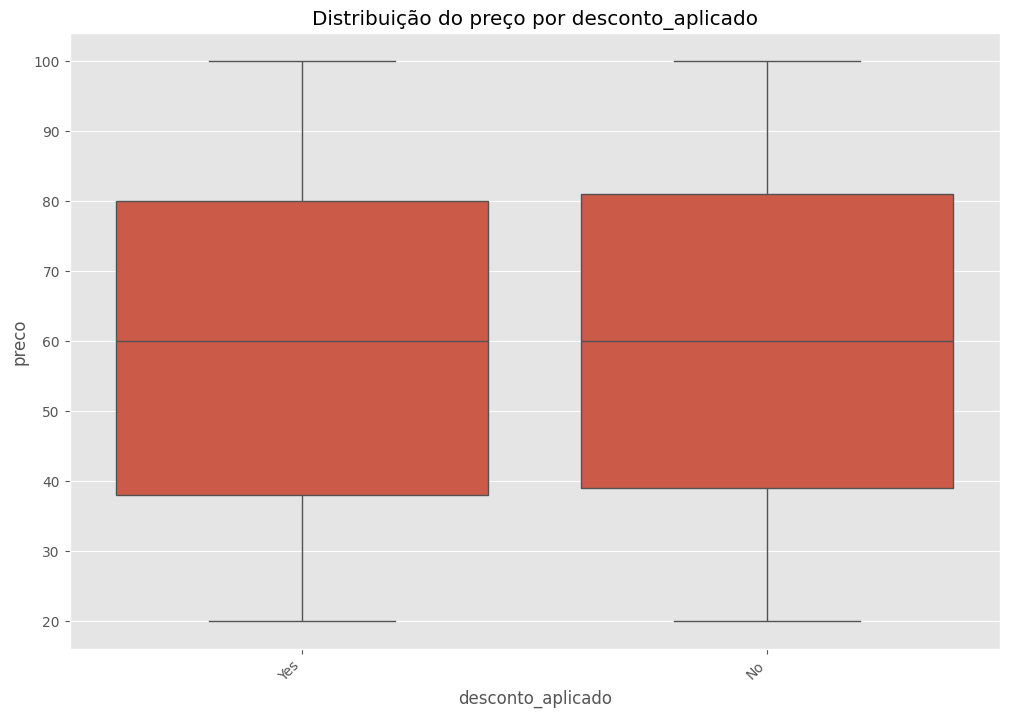

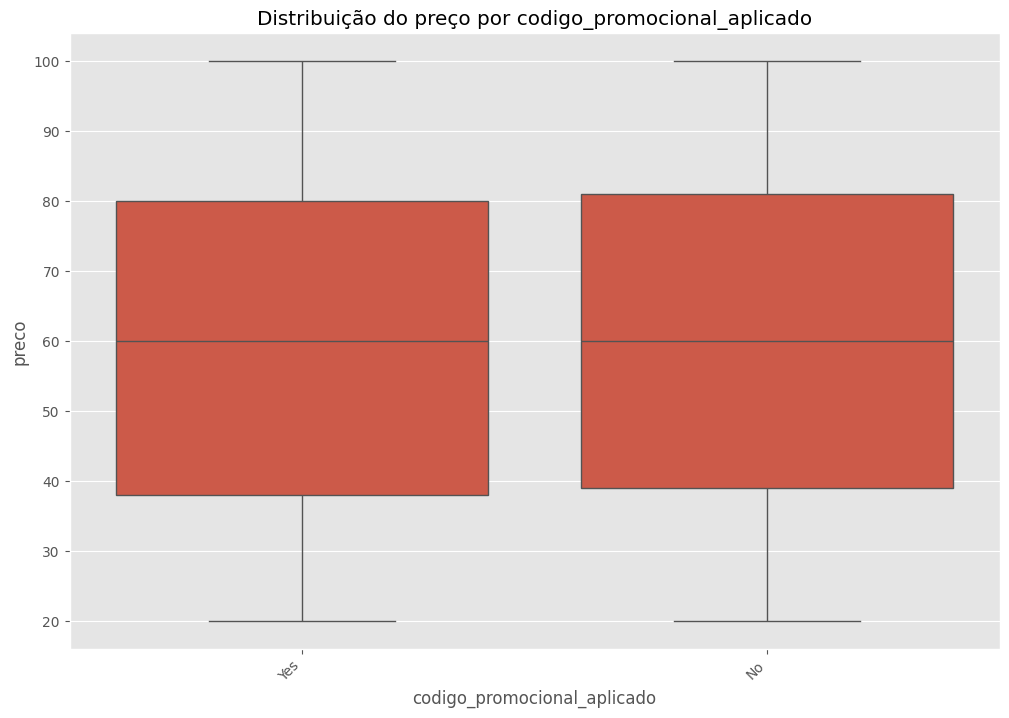

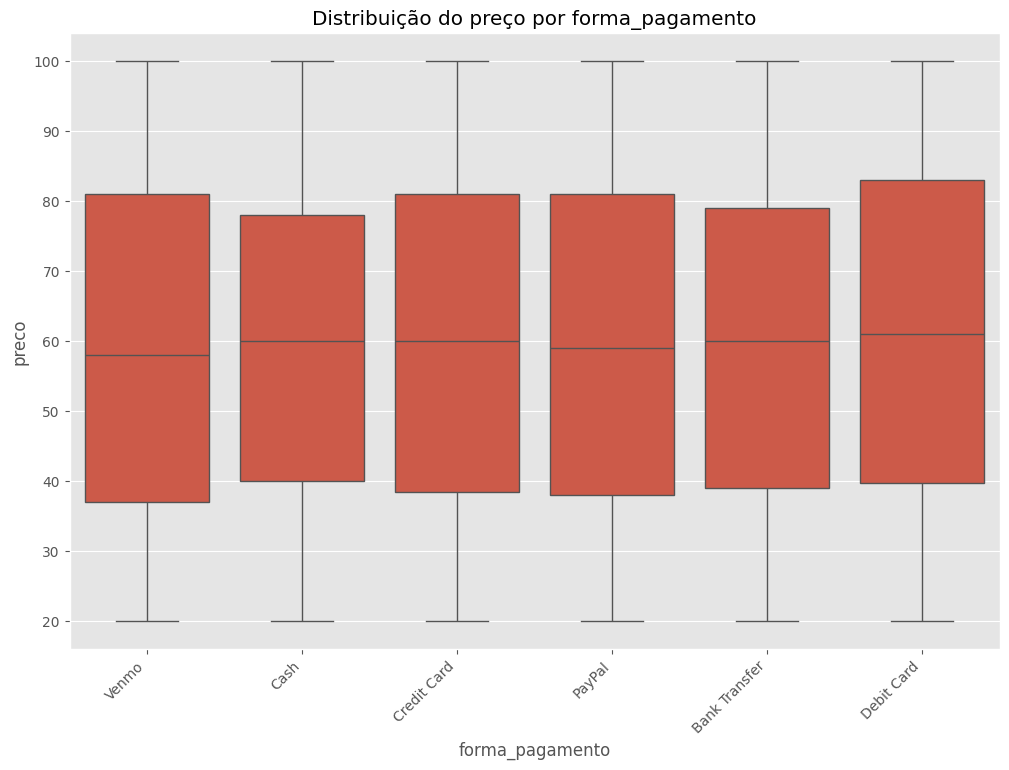

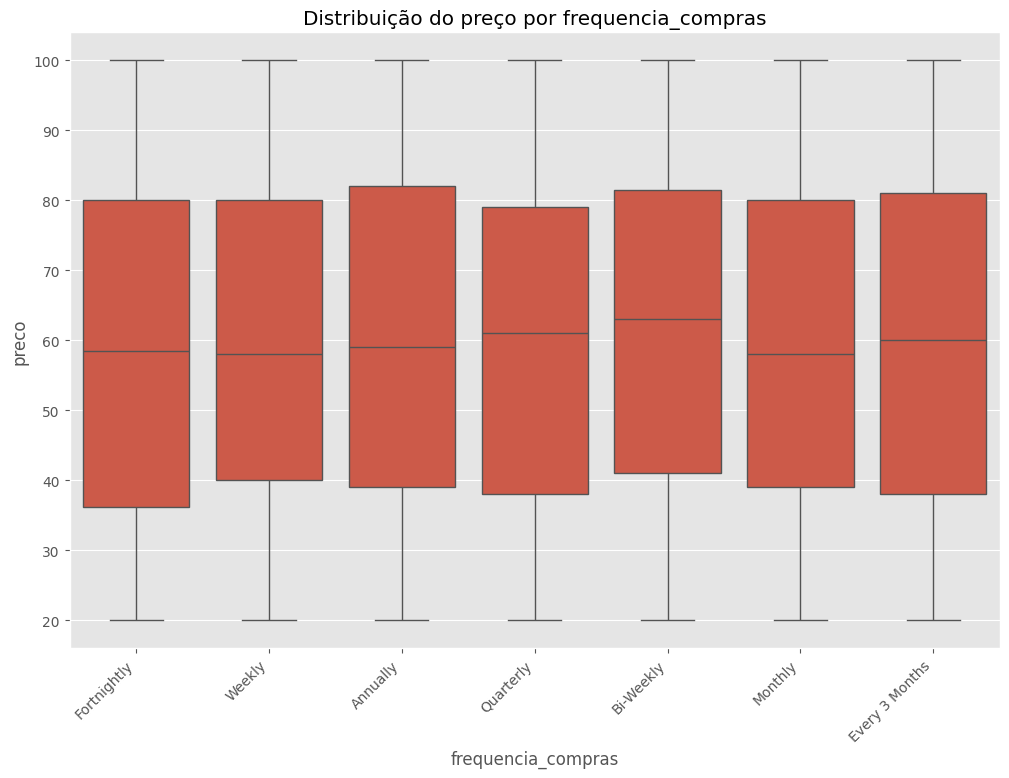

In [56]:
for column in df_shopping.select_dtypes('object').columns:
  plt.figure(figsize=(12, 8))
  sns.boxplot(x=column, y='preco', data=df_shopping)
  plt.title(f'Distribuição do preço por {column}')
  plt.xticks(rotation=45, ha='right')
  plt.show()

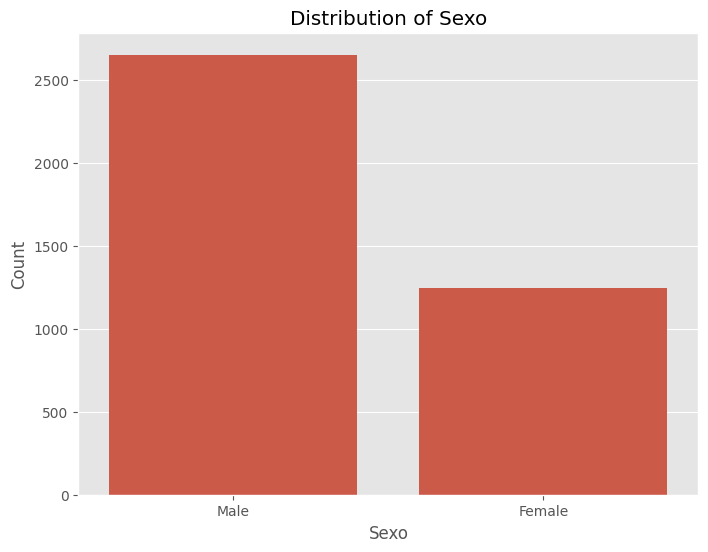

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sexo', data=df_shopping)
plt.title('Distribution of Sexo')
plt.xlabel('Sexo')
plt.ylabel('Count')
plt.show()

In [69]:
columns = []
for item in list(combinations(df_shopping.select_dtypes('object').columns, 2)):
    tabela = pd.crosstab(df_shopping[item[0]], df_shopping[item[1]])

    chi2, pvalor, gl, freq_esp = chi2_contingency(tabela)
    columns.append(dict(column_1=item[0], column_2=item[1], p_value=pvalor))

In [70]:
items = list(filter(lambda x: x['p_value'] < 0.05, columns))
items

[{'column_1': 'sexo',
  'column_2': 'assinatura',
  'p_value': np.float64(3.3268630006040623e-149)},
 {'column_1': 'sexo',
  'column_2': 'tipo_envio',
  'p_value': np.float64(0.03160742064222473)},
 {'column_1': 'sexo',
  'column_2': 'desconto_aplicado',
  'p_value': np.float64(1.7645380691667684e-302)},
 {'column_1': 'sexo',
  'column_2': 'codigo_promocional_aplicado',
  'p_value': np.float64(1.7645380691667684e-302)},
 {'column_1': 'item_comprado',
  'column_2': 'categoria',
  'p_value': np.float64(0.0)},
 {'column_1': 'assinatura',
  'column_2': 'desconto_aplicado',
  'p_value': np.float64(0.0)},
 {'column_1': 'assinatura',
  'column_2': 'codigo_promocional_aplicado',
  'p_value': np.float64(0.0)},
 {'column_1': 'desconto_aplicado',
  'column_2': 'codigo_promocional_aplicado',
  'p_value': np.float64(0.0)}]

In [71]:
columns_filtered = list(map(lambda x: x['column_1'], items))
columns_filtered.extend(list(map(lambda x: x['column_2'], items)))
columns_filtered = list(set(columns_filtered))
columns_filtered

['assinatura',
 'sexo',
 'codigo_promocional_aplicado',
 'categoria',
 'item_comprado',
 'tipo_envio',
 'desconto_aplicado']

In [79]:
mca = prince.MCA(n_components=3).fit(df_shopping[columns_filtered])

In [80]:
quant_dim = mca.J_ - mca.K_

print(f"quantidade total de categorias: {mca.J_}")
print(f"quantidade de variáveis: {mca.K_}")
print(f"quantidade de dimensões: {quant_dim}")

quantidade total de categorias: 43
quantidade de variáveis: 7
quantidade de dimensões: 36


In [81]:
coord_padrao = mca.column_coordinates(df_shopping[columns_filtered])/np.sqrt(mca.eigenvalues_)

In [82]:
coord_obs = mca.row_coordinates(df_shopping[columns_filtered])

In [83]:

chart = coord_padrao.reset_index()

var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])

nome_categ=[]
for col in df_shopping[columns_filtered]:
    nome_categ.append(df_shopping[columns_filtered][col].sort_values(ascending=True).unique())
    categorias = pd.DataFrame(nome_categ).stack().reset_index()

chart_df_mca = pd.DataFrame({'categoria': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'obs_z': chart[2],
                             'variavel': var_chart,
                             'categoria_id': categorias[0]})

# Segundo passo: gerar o gráfico de pontos

fig = px.scatter_3d(chart_df_mca,
                    x='obs_x',
                    y='obs_y',
                    z='obs_z',
                    color='variavel',
                    text=chart_df_mca.categoria_id)
fig.show()